In [62]:
# import packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec 
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
from matplotlib.colors import LinearSegmentedColormap

import ROOT
import root_numpy

In [63]:
# function for calling the root outputs
def get_energy(filename):
    f = ROOT.TFile(filename)
    f.cd('events')
    tree = f.Get('events/events')
    E=root_numpy.tree2array(tree)
    return E['Ed']

In [90]:
# parameters for calculating the weights
PTFE_mass = 182.1 # kg
LXe_FV_mass = 39341.85 # kg
generated_events = 100000
bin_width = 10 # keV
activity_Co60 = 0.000027 # Bq/kg
activity_K40 = 0.000343 # Bq/kg
activity_Cs137 = 0.0002 # Bq/kg
activity_U238 = 0.00025 # Bq/kg
activity_U235 = 0.000087 # Bq/kg
activity_Ra226 = 0.00012 # Bq/kg
activity_Th228 = 0.000065 # Bq/kg
activity_Th232 = 0.000041 # Bq/kg
ER_discrimination = 0.9998

In [91]:
# function for calculating the weights
def calculate_weights(activity, E):
    TEff=generated_events/(PTFE_mass*activity) 
    R=86400*len(E)/(TEff*LXe_FV_mass*bin_width) 
    weights=[]
    for i in range(len(E)):
        weights.append(R) 
    return weights

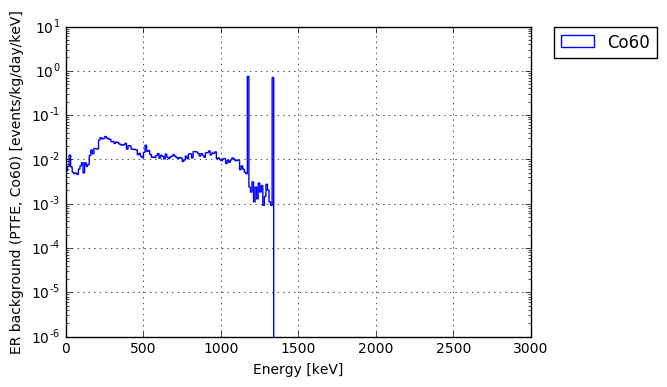

In [110]:
##### Co-60 #####
E_Co60=get_energy('PTFE_Co60_Sort.root')
E_Co60=np.array([E_Co60[i][0] for i in range(len(E_Co60))])
weights_Co60 = calculate_weights(activity_Co60, E_Co60)

plt.hist(E_Co60, bins=np.arange(0, 3000, bin_width), weights=weights_Co60, histtype='step', color='b', label='Co60')
plt.ylim(0.000001, 10)
plt.xlim(0,3000)
plt.xlabel('Energy [keV]')
plt.ylabel('ER background (PTFE, Co60) [events/kg/day/keV]')
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.show()

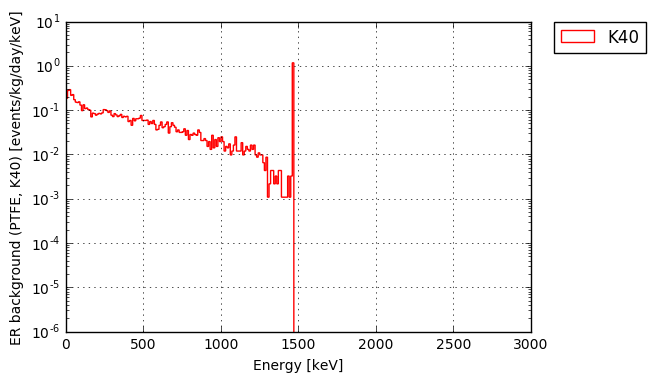

In [111]:
##### K-40 #####
E_K40=get_energy('PTFE_K40_Sort.root')
E_K40=np.array([E_K40[i][0] for i in range(len(E_K40))])
weights_K40 = calculate_weights(activity_K40, E_K40)

plt.hist(E_K40, bins=np.arange(0, 3000, bin_width), weights=weights_K40, histtype='step', color='r', label='K40')
plt.ylim(0.000001, 10)
plt.xlim(0,3000)
plt.xlabel('Energy [keV]')
plt.ylabel('ER background (PTFE, K40) [events/kg/day/keV]')
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.show()

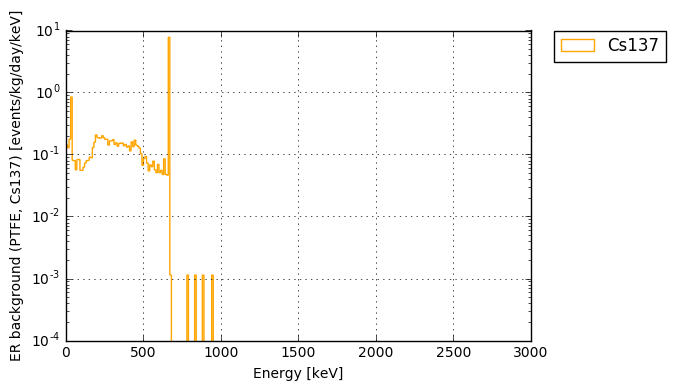

In [112]:
##### Cs-137 #####
E_Cs137=get_energy('PTFE_Cs137_Sort.root')
E_Cs137=np.array([E_Cs137[i][0] for i in range(len(E_Cs137))])
weights_Cs137 = calculate_weights(activity_Cs137, E_Cs137)

plt.hist(E_Cs137, bins=np.arange(0, 3000, bin_width), weights=weights_Cs137, histtype='step', color='orange', label='Cs137')
plt.ylim(0.0001,10)
plt.xlim(0,3000)
plt.xlabel('Energy [keV]')
plt.ylabel('ER background (PTFE, Cs137) [events/kg/day/keV]')
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.show()

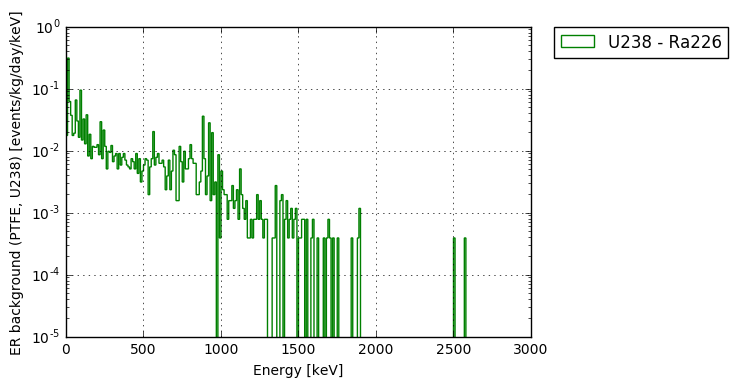

In [119]:
##### U-238 #####
E_U238=get_energy('PTFE_U238_Sort.root')
E_U238=np.array([E_U238[i][0] for i in range(len(E_U238))])
weights_U238 = calculate_weights(activity_U238, E_U238)

plt.hist(E_U238, bins=np.arange(0, 3000, bin_width), weights=weights_U238, histtype='step', color='g', label='U238 - Ra226')
plt.ylim(0.00001,1)
plt.xlim(0,3000)
plt.xlabel('Energy [keV]')
plt.ylabel('ER background (PTFE, U238) [events/kg/day/keV]')
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.show()

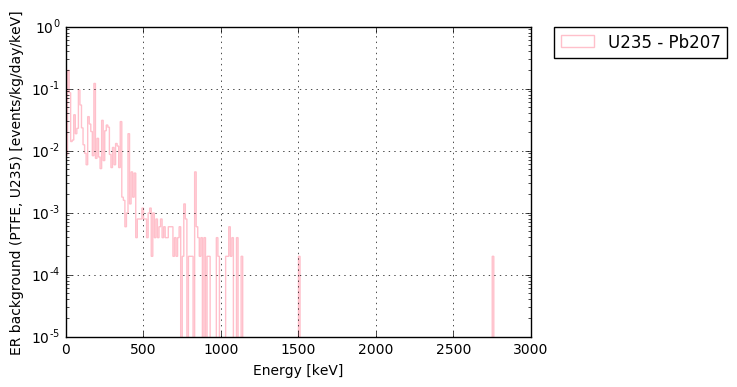

In [120]:
##### U-235 #####
E_U235=get_energy('PTFE_U235_Sort.root')
E_U235=np.array([E_U235[i][0] for i in range(len(E_U235))])
weights_U235 = calculate_weights(activity_U235, E_U235)

plt.hist(E_U235, bins=np.arange(0, 3000, bin_width), weights=weights_U235, histtype='step', color='pink', label='U235 - Pb207')
plt.ylim(0.00001,1)
plt.xlim(0,3000)
plt.xlabel('Energy [keV]')
plt.ylabel('ER background (PTFE, U235) [events/kg/day/keV]')
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.show()

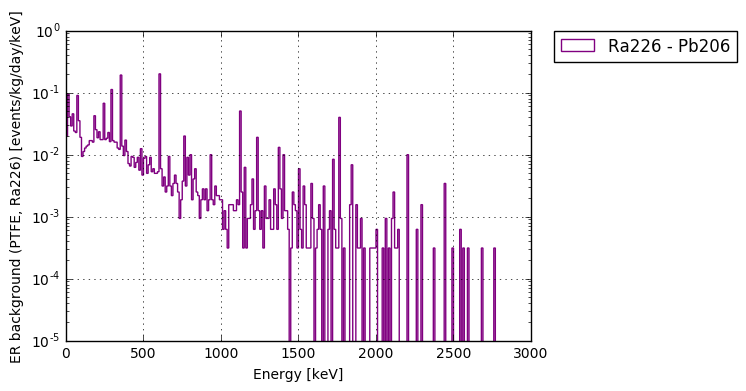

In [121]:
##### Ra-226 #####
E_Ra226=get_energy('PTFE_Ra226_Sort.root')
E_Ra226=np.array([E_Ra226[i][0] for i in range(len(E_Ra226))])
weights_Ra226 = calculate_weights(activity_Ra226, E_Ra226)

plt.hist(E_Ra226, bins=np.arange(0, 3000, bin_width), weights=weights_Ra226, histtype='step', color='purple', label='Ra226 - Pb206')
plt.ylim(0.00001,1)
plt.xlim(0,3000)
plt.xlabel('Energy [keV]')
plt.ylabel('ER background (PTFE, Ra226) [events/kg/day/keV]')
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.show()

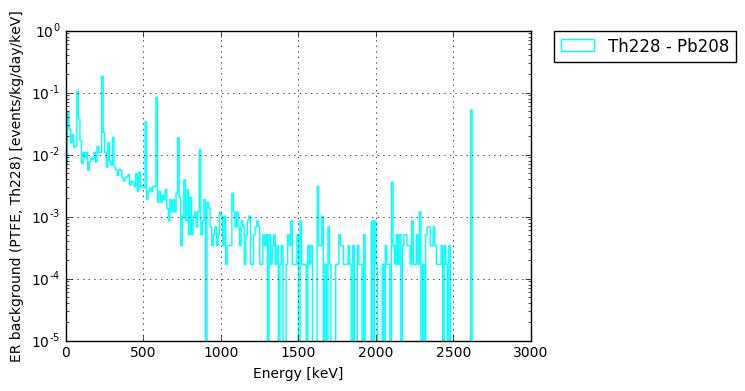

In [122]:
##### Th-228 #####
E_Th228=get_energy('PTFE_Th228_Sort.root')
E_Th228=np.array([E_Th228[i][0] for i in range(len(E_Th228))])
weights_Th228 = calculate_weights(activity_Th228, E_Th228)

plt.hist(E_Th228, bins=np.arange(0, 3000, bin_width), weights=weights_Th228, histtype='step', color='cyan', label='Th228 - Pb208')
plt.ylim(0.00001,1)
plt.xlim(0,3000)
plt.xlabel('Energy [keV]')
plt.ylabel('ER background (PTFE, Th228) [events/kg/day/keV]')
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.show()

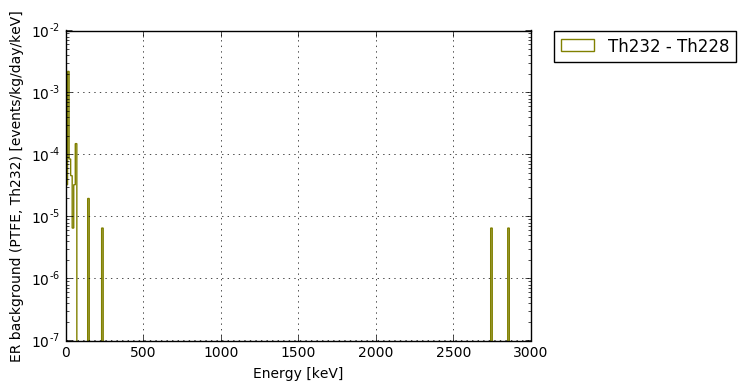

In [123]:
##### Th-232 #####
E_Th232=get_energy('PTFE_Th232_Sort.root')
E_Th232=np.array([E_Th232[i][0] for i in range(len(E_Th232))])
weights_Th232 = calculate_weights(activity_Th232, E_Th232)

plt.hist(E_Th232, bins=np.arange(0, 3000, bin_width), weights=weights_Th232, histtype='step', color='olive', label='Th232 - Th228')
plt.ylim(0.0000001,0.01)
plt.xlim(0,3000)
plt.xlabel('Energy [keV]')
plt.ylabel('ER background (PTFE, Th232) [events/kg/day/keV]')
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.show()

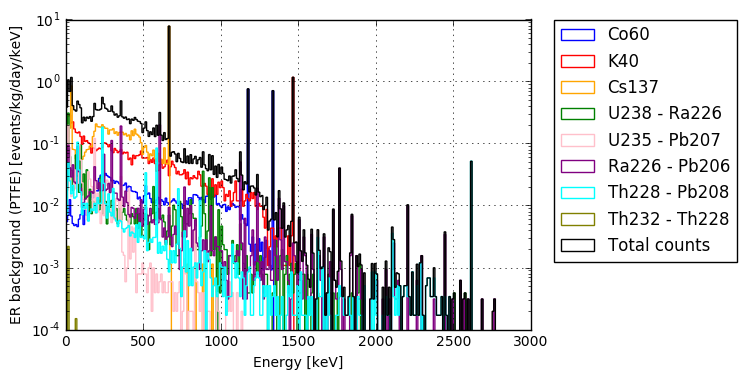

In [124]:
##### FINAL HISTOGRAMS #####
plt.hist(E_Co60, bins=np.arange(0, 3000, bin_width), weights = weights_Co60, alpha=1, label='Co60', histtype='step', color='b')
plt.hist(E_K40, bins=np.arange(0, 3000, bin_width), weights = weights_K40, alpha=1, label='K40', histtype='step', color='r')
plt.hist(E_Cs137, bins=np.arange(0, 3000, bin_width), weights = weights_Cs137, alpha=1, label='Cs137', histtype='step', color='orange')
plt.hist(E_U238, bins=np.arange(0, 3000, bin_width), weights = weights_U238, alpha=1, label='U238 - Ra226', histtype='step', color='g')
plt.hist(E_U235, bins=np.arange(0, 3000, bin_width), weights = weights_U235, alpha=1, label='U235 - Pb207', histtype='step', color='pink')
plt.hist(E_Ra226, bins=np.arange(0, 3000, bin_width), weights = weights_Ra226, alpha=1, label='Ra226 - Pb206', histtype='step', color='purple')
plt.hist(E_Th228, bins=np.arange(0, 3000, bin_width), weights = weights_Th228, alpha=1, label='Th228 - Pb208', histtype='step', color='cyan')
plt.hist(E_Th232, bins=np.arange(0, 3000, bin_width), weights = weights_Th232, alpha=1, label='Th232 - Th228', histtype='step', color='olive')
plt.hist(E_total, bins=np.arange(0, 3000, bin_width), weights = weights_total, alpha=1, label='Total counts', histtype='step', color='black')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0.0001,10)
plt.xlim(0,3000)
plt.xlabel('Energy [keV]')
plt.ylabel('ER background (PTFE) [events/kg/day/keV]')
plt.yscale("log")
plt.grid()
plt.show()


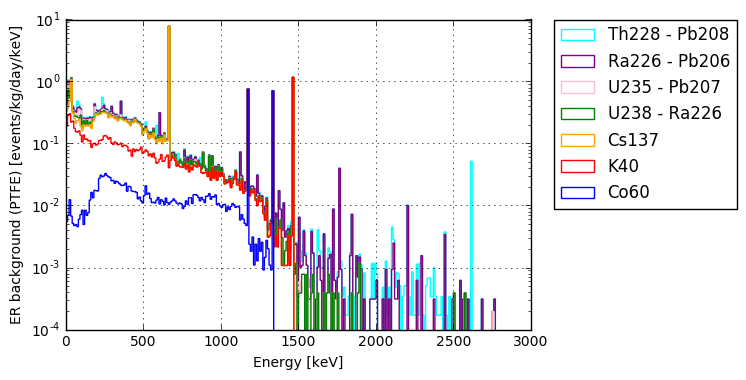

In [102]:
##### FINAL HISTOGRAM in stacked option #####
plt.hist((E_Co60,E_K40,E_Cs137,E_U238,E_U235,E_Ra226,E_Th228), bins=np.arange(0, 3000, bin_width), weights = (weights_Co60,weights_K40,weights_Cs137,weights_U238,weights_U235,weights_Ra226,weights_Th228), histtype='step', label=('Co60','K40','Cs137','U238 - Ra226','U235 - Pb207','Ra226 - Pb206','Th228 - Pb208'), stacked=True, color=('b','r','orange','g','pink','purple','cyan'))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Energy [keV]')
plt.ylabel('ER background (PTFE) [events/kg/day/keV]')
plt.yscale("log")
plt.grid()

plt.show()

In [101]:
E_total=[]
for entry in E_Co60:
    E_total.append(entry)
for entry in E_K40:
    E_total.append(entry)
for entry in E_Cs137:
    E_total.append(entry)
for entry in E_U238:
    E_total.append(entry)
for entry in E_U235:
    E_total.append(entry)
for entry in E_Ra226:
    E_total.append(entry)
for entry in E_Th228:
    E_total.append(entry)
for entry in E_Th232:
    E_total.append(entry)
    
weights_total=[]
for entry in weights_Co60:
    weights_total.append(entry)
for entry in weights_K40:
    weights_total.append(entry)
for entry in weights_Cs137:
    weights_total.append(entry)
for entry in weights_U238:
    weights_total.append(entry)
for entry in weights_U235:
    weights_total.append(entry)
for entry in weights_Ra226:
    weights_total.append(entry)
for entry in weights_Th228:
    weights_total.append(entry)
for entry in weights_Th232:
    weights_total.append(entry)

In [88]:
##### NUMBER OF COUNTS IN TOTAL (with weights included, from 0-3000keV) /kg/day #####
total_counts=10*(len(E_Co60)*weights_Co60[0]+len(E_K40)*weights_K40[0]+len(E_Cs137)*weights_Cs137[0]+len(E_U238)*weights_U238[0]+len(E_U235)*weights_U235[0]+len(E_Ra226)*weights_Ra226[0]+len(E_Th228)*weights_Th228[0]+len(E_Th232)*weights_Th232[0])
print(total_counts)

33.41447085144088


In [103]:
##### NUMBER OF COUNTS IN WIMP ENERGY REGION (1-11 keV) /kg/day #####
E_total_WIMP=[]
lower_energy_limit=1
upper_energy_limit=11
for entry in E_Co60:
    if entry<upper_energy_limit and entry>lower_energy_limit:
        E_total_WIMP.append(entry)
a=len(E_total_WIMP)
for entry in E_K40:
    if entry<upper_energy_limit and entry>lower_energy_limit:
        E_total_WIMP.append(entry)
b=len(E_total_WIMP)
for entry in E_Cs137:
    if entry<upper_energy_limit and entry>lower_energy_limit:
        E_total_WIMP.append(entry)
c=len(E_total_WIMP)
for entry in E_U238:
    if entry<upper_energy_limit and entry>lower_energy_limit:
        E_total_WIMP.append(entry)
d=len(E_total_WIMP)
for entry in E_U235:
    if entry<upper_energy_limit and entry>lower_energy_limit:
        E_total_WIMP.append(entry)
e=len(E_total_WIMP)
for entry in E_Ra226:
    if entry<upper_energy_limit and entry>lower_energy_limit:
        E_total_WIMP.append(entry)
f=len(E_total_WIMP)
for entry in E_Th228:
    if entry<upper_energy_limit and entry>lower_energy_limit:
        E_total_WIMP.append(entry)
g=len(E_total_WIMP)
for entry in E_Th232:
    if entry<upper_energy_limit and entry>lower_energy_limit:
        E_total_WIMP.append(entry)
h=len(E_total_WIMP)

total_counts_WIMP=10*(a*weights_Co60[0]+(b-a)*weights_K40[0]+(c-b)*weights_Cs137[0]+(d-c)*weights_U238[0]+(e-d)*weights_U235[0]+(f-e)*weights_Ra226[0]+(g-f)*weights_Th228[0]+((h-g)*weights_Th232[0]))
print(total_counts_WIMP)


4.6189523568831055


In [104]:
##### NUMBER OF COUNTS IN WIMP ENERGY REGION IN FIVE YEARS #####
total_counts_WIMP_fiveyears = total_counts_WIMP*LXe_FV_mass*365*(1-ER_discrimination)*5
print(total_counts_WIMP_fiveyears)

66327.11773529187
